In [1]:
import sys
sys.path.append('..')
from gridworld_agent import *
import csv
import numpy as np
%matplotlib inline
def writeLikelihoodToFile(data, filename):
    with open(filename, 'w+') as f:
        for val in data:
            coordlist, likelihood = val
            coords = np.array2string(coordlist).replace('\n', '')
            f.write(str(likelihood) + ',')
            f.write(coords)
            f.write('\n')

In [17]:
# First, we find a good softmax value
possibilities = [0.001, 0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.5]
for val in possibilities:
    # put reward in upper left corner
    a = GridWorldAgent(softmax=val,width=10, rewardValues={9:10})
    a.Run()
    # check policy for state directly to the left of the reward. The correct action is right - action[1]
    prob_correct_choice_r = a.mdp.policy[1,8]
    # repeat, checking the state two away - correct action is right - action[1]
    prob_correct_choice_farther = a.mdp.policy[1,7]
    print(val, prob_correct_choice_r, prob_correct_choice_farther)
    
# Based on this, we select a softmax value of 0.2
a = GridWorldAgent(softmax=0.2,width=10, rewardValues={9:10})

(0.001, 0.25, 0.25)
(0.01, 1.0, 0.25)
(0.05, 0.999954595335379, 0.9998796061934903)
(0.1, 0.9931921284761197, 0.9888530032340903)
(0.2, 0.9112819730480288, 0.8855004619070114)
(0.25, 0.8504709566192, 0.8172016845841447)
(0.3, 0.7896249481936108, 0.7526361545677571)
(0.5, 0.6051702413311559, 0.5715307132376825)


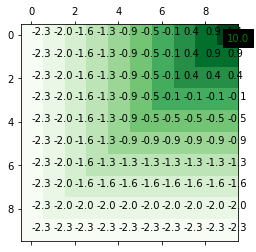

IndexError: index 8 is out of bounds for axis 0 with size 1

In [6]:
# why is going right from 2 away only 0.5?
a.Run()
a.Display()
# we see that going right and going down right have the value

In [4]:
print(a.mdp.values[0,8])
print(a.mdp.values[0,18])

0.0
0.0


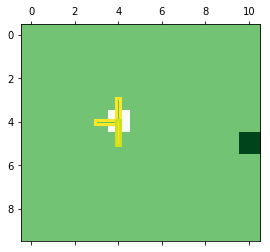

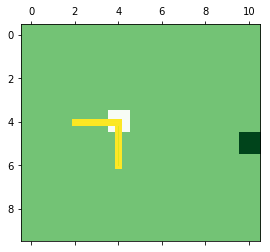

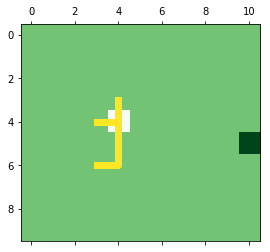

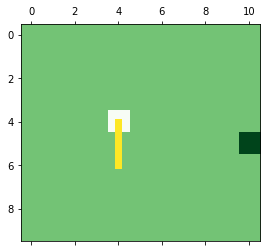

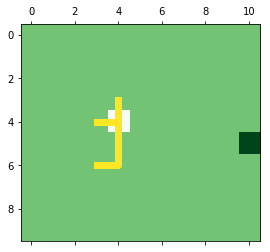

In [2]:
# Next, we create a map with the reward at the middle right, and display and write data
a = GridWorldAgent(softmax=0.2,width=11, rewardValues={65:10})
lengths = [1,2,3,4,5]
for length in lengths:
    data = a.getLikelihoodAllPaths(length, display=True, topthree=True)
    writeLikelihoodToFile(data, '11width_one_reward_len_'+str(length)+'.csv')
# a.displayAllPaths(2, topthree=False)
# # # len(data)
# coord = data[0][0]
# print(len(coord))
# print(len(np.unique(coord,axis=0)))

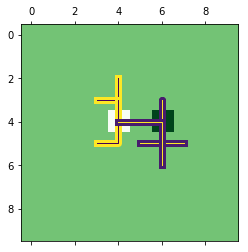

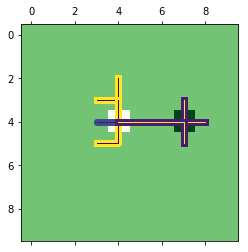

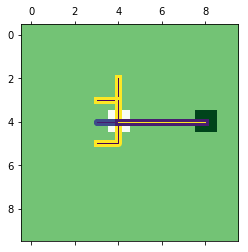

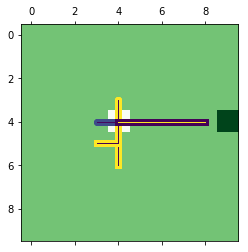

In [13]:
# an interesting observation, perhaps a bug: further from the goal, removes possibility of straight paths
reward = [46,47,48,49]
for r in reward:
    a = GridWorldAgent(softmax=0.2,width=10, rewardValues={r:10})
    a.getLikelihoodAllPaths(4, display=True, topthree=True)

In [ ]:
repetitive = []
nonrep = []
for path in data:
    coordlist, likelihood = val
    if len(np.unique(coordlist, axis=0)) < len(coordlist):
        repetitive.append(likelihood)
    else:
        nonrep.append(likelihood)# 1840
print(len(repetitive)) 
print(len(nonrep))

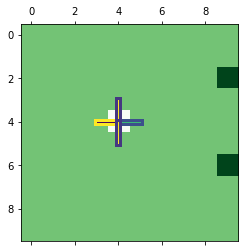

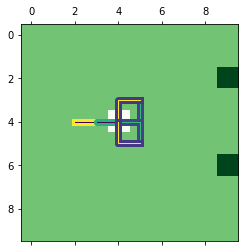

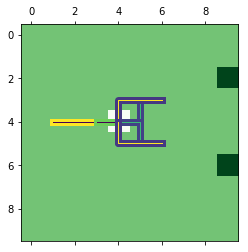

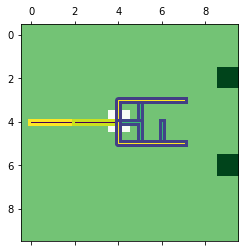

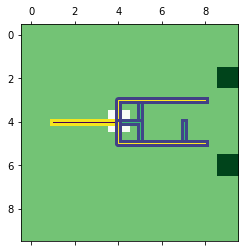

In [12]:
# Next, we create a map with the reward at the middle right, and display and write data
a = GridWorldAgent(softmax=0.2,width=10, rewardValues={29:10, 69:10})
lengths = [1,2,3,4,5]
for length in lengths:
    data = a.getLikelihoodAllPaths(length, display=True, topthree=True)
    writeLikelihoodToFile(data, 'two_reward_len_'+str(length)+'.csv')


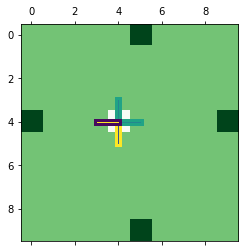

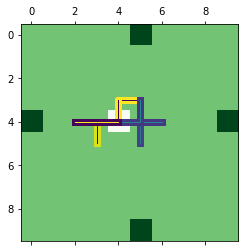

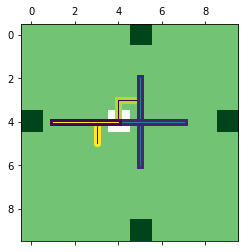

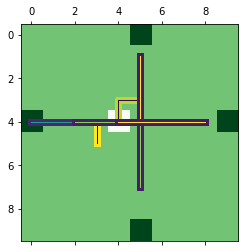

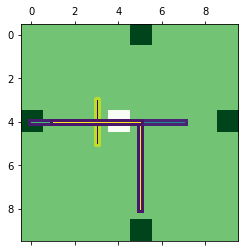

In [10]:
# Next, we create a map with the reward at the middle right, and display and write data
a = GridWorldAgent(softmax=0.2,width=11, rewardValues={5:10, 49:10, 40:10, 95:10})
lengths = [1,2,3,4,5]
for length in lengths:
    data = a.getLikelihoodAllPaths(length, display=True, topthree=True)
    writeLikelihoodToFile(data, 'four_reward_len_'+str(length)+'.csv')

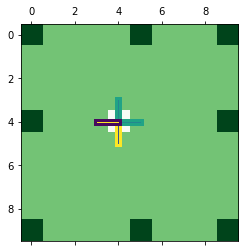

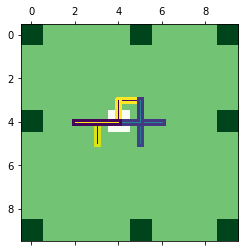

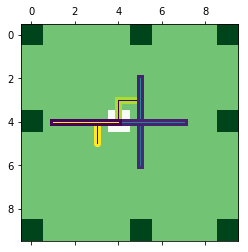

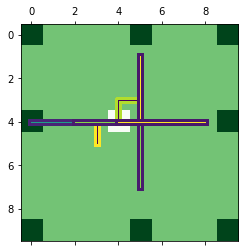

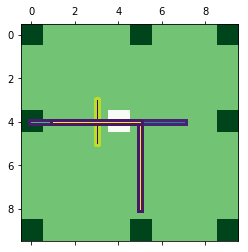

In [11]:
# Next, we create a map with 8 values
a = GridWorldAgent(softmax=0.2,width=11, rewardValues={0:10, 9:10, 90:10, 99:10, 5:10, 49:10, 40:10, 95:10})
lengths = [1,2,3,4,5]
for length in lengths:
    data = a.getLikelihoodAllPaths(length, display=True, topthree=True)
    writeLikelihoodToFile(data, 'eight_reward_len_'+str(length)+'.csv')

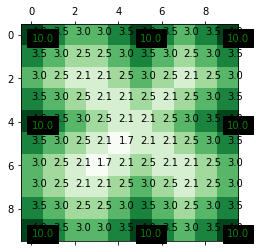

array([0.96446568, 0.01184477, 0.01184477, 0.01184477])

In [16]:
a = GridWorldAgent(softmax=0.2,width=10, rewardValues={0:10, 9:10, 90:10, 99:10, 5:10, 49:10, 40:10, 95:10})
a.Run()
a.Display()
a.mdp.policy[:,43]
# a.mdp.policy[:,42]

In [ ]:
b = GridWorldAgent(softmax=0.01,width=20,height=20,rewardValues =  {0:10})
b.displayAllPaths(4, topthree=True)

In [ ]:
d = GridWorldAgent(softmax=0.1,width=4,height=4,rewardValues =  {2:10})
d.displayAllPaths(1, topthree=True)

In [ ]:
c = GridWorldAgent(softmax=0.1,width=10,height=10,rewardValues =  {39:10, 69:10})
c.displayAllPaths(1)
c.displayAllPaths(2)
c.displayAllPaths(3)
c.displayAllPaths(4)
c.displayAllPaths(5, topthree = True)

In [ ]:
a.displayAllPaths(3)

In [ ]:
b = GridWorldAgent(softmax=0.1,width=11,height=11,rewardValues =  {0:11, 30:11, 60:11})
b.displayAllPaths(1)
b.displayAllPaths(2)
b.displayAllPaths(3)

In [ ]:
b = GridWorldAgent(softmax=0.1,width=10,height=10,rewardValues =  {0:10, 29:10, 59:10, 70:10})
b.displayAllPaths(1)
b.displayAllPaths(2)
b.displayAllPaths(3)